# Figure 1 - Multiview map of pancreatic gene expression 

### Pre-requisites

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

import scanpy as sc
import squidpy as sq
import anndata as ad

import matplotlib.pyplot as plt

#sc.settings.set_figure_params(dpi=80, facecolor="white")

### Load data

In [2]:
folder = '/lustre/groups/ml01/workspace/sara.jimenez/spatial_pancreas_data/preprocessed_data/data4downstream/'
files   = ['s1_covet_niche_def_corr_per_fov.h5ad','s2_covet_niche_def_corr_per_fov.h5ad','s3_covet_niche_def_corr_per_fov.h5ad']

s1 = sc.read_h5ad(folder+files[0])
#s1.obs["fov"] = s1.obs["fov"].astype(str) + "_s1"
s2 = sc.read_h5ad(folder+files[1])
#s2.obs["fov"] = s2.obs["fov"].astype(str) + "_s2"
s3 = sc.read_h5ad(folder+files[2])
#s3.obs["fov"] = s3.obs["fov"].astype(str) + "_s3"

adata = ad.concat([s1, s2, s3], join='outer',uns_merge='same',axis=0,pairwise=True) 
adata

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 386727 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max', 'donor', 'cell_type', 'leiden_covet_0.2', 'Niche_label'
    uns: 'CellTypes_max_colors', 'Niche_label_colors', 'cell_type_coarse_colors', 'hvg', 'leiden_covet_0.2', 'n_neighbors=30', 'neighbors', 'pca', 'spatial'
    obsm: 'X_pca', 'X_umap', 'covet-n_neighbors=30', 'covet_sqrt-n_neighbors=30', 'covet_sqrt_flat-n_neighbors=30', 'spatial', 'spati

In [8]:
adata.obs.fov.unique

<bound method Series.unique of 1_1         1_s1
2_1         1_s1
3_1         1_s1
4_1         1_s1
5_1         1_s1
           ...  
7236_25    25_s3
7237_25    25_s3
7239_25    25_s3
7240_25    25_s3
7241_25    25_s3
Name: fov, Length: 386727, dtype: category
Categories (71, object): ['1_s1', '1_s2', '1_s3', '2_s1', ..., '23_s3', '24_s1', '24_s3', '25_s3']>

### Data Exploration

The anndata object is annotated with different levels of granularity:  
1. ``` 'cell_type_coarse' ``` obs field corresponds to the major pancreatic cell types identified only with the spatial gene panel.
2. ``` 'CellTypes_max' ``` obs field is the mapped annotation from npod dissociated data. The mapping task was performed using the optimal-transport-based tool [moscot](https://moscot.readthedocs.io/en/latest/notebooks/examples/problems/900_annotation_mapping.html).
3. ``` 'Niche_label' ``` obs field correspond to the niches identified using covet. 

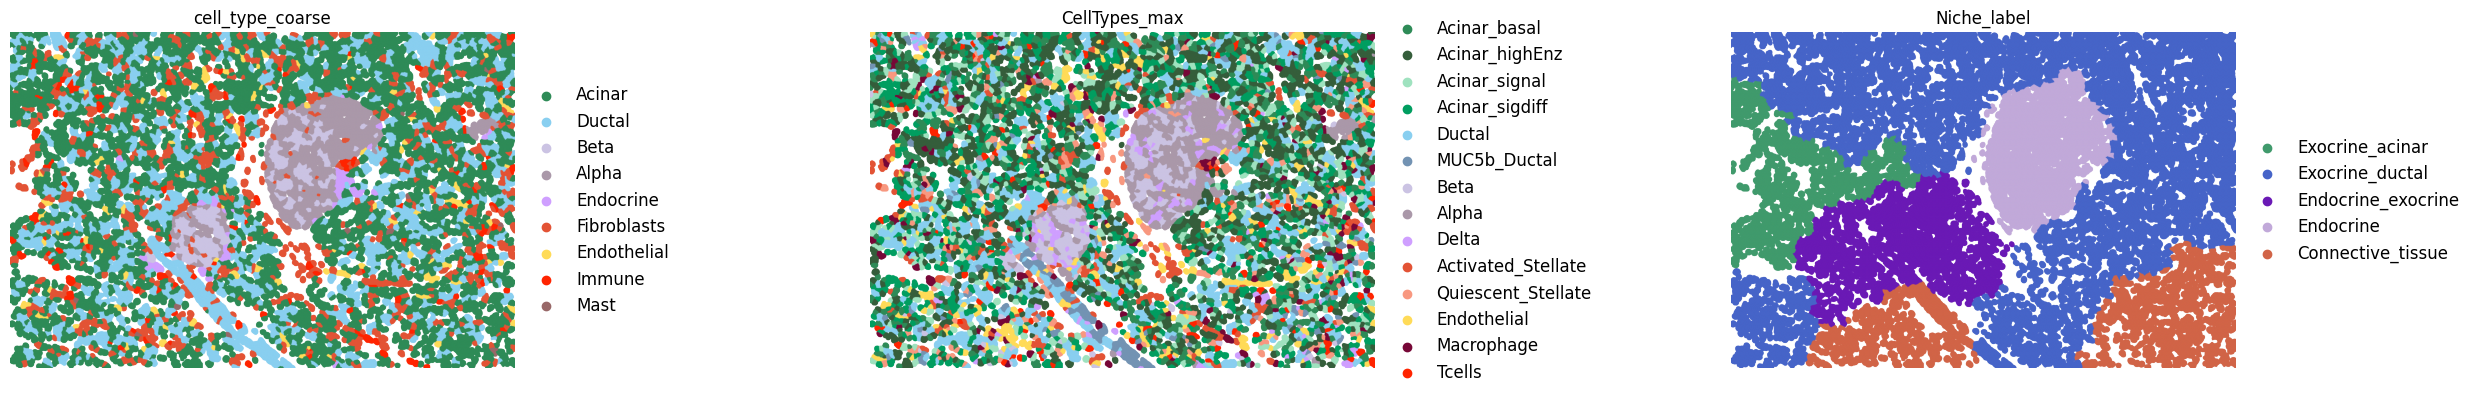

In [3]:
fovs = ['12']
for i in fovs:
    sq.pl.spatial_segment(s1,
                          color=['cell_type_coarse','CellTypes_max','Niche_label'],
                          library_id=[i],
                          library_key='fov', 
                          seg_cell_id='cell_ID',
                          img=False,frameon=False, wspace=0.5, legend_fontsize=12)

In [4]:
x = pd.crosstab(adata.obs.Niche_label,adata.obs.CellTypes_max)
x

CellTypes_max,Acinar_basal,Acinar_highEnz,Acinar_signal,Acinar_sigdiff,Ductal,MUC5b_Ductal,Beta,Alpha,Delta,Activated_Stellate,Quiescent_Stellate,Endothelial,Macrophage,Tcells
Niche_label,,,,,,,,,,,,,,
Exocrine_acinar,9383,19721,9726,21689,14394,2168,1730,1207,853,4018,3803,4373,3432,2230
Exocrine_ductal,15298,30327,15130,33602,27920,5065,3996,4335,2238,7657,6464,7644,9710,4756
Muc5b_ductal,6,22,12,23,65,295,33,15,33,76,23,31,48,9
Endocrine_exocrine,5201,8883,4251,9191,8293,1927,3513,3366,1529,2646,2458,2772,2108,1822
Endocrine,1339,2803,1157,2305,2719,409,4233,9141,2124,1161,1031,905,770,503
Connective_tissue,2277,3699,1990,3743,3087,783,806,739,515,1654,1271,1443,1398,1202


### Spatially variable genes through Moran's I score

In [5]:
adata

AnnData object with n_obs × n_vars = 386727 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max', 'donor', 'cell_type', 'leiden_covet_0.2', 'Niche_label'
    uns: 'CellTypes_max_colors', 'Niche_label_colors', 'cell_type_coarse_colors', 'hvg', 'leiden_covet_0.2', 'n_neighbors=30', 'neighbors', 'pca', 'spatial'
    obsm: 'X_pca', 'X_umap', 'covet-n_neighbors=30', 'covet_sqrt-n_neighbors=30', 'covet_sqrt_flat-n_neighbors=30', 'spatial', 'spati

In [7]:
sq.gr.spatial_autocorr(
    s1,
    mode="moran",
    n_perms=100,
    n_jobs=4,
)
#adata.uns["moranI"].head(50)

KeyError: "Spatial connectivity key `spatial_connectivities` not found in `adata.obsp`. Please run `squidpy.gr.spatial_neighbors(..., key_added='spatial')` first."

In [33]:
adata.uns["moranI"].shape

(979, 9)

/tmp/ipykernel_152646/1673531547.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = gene_expr_data.groupby('group').mean()


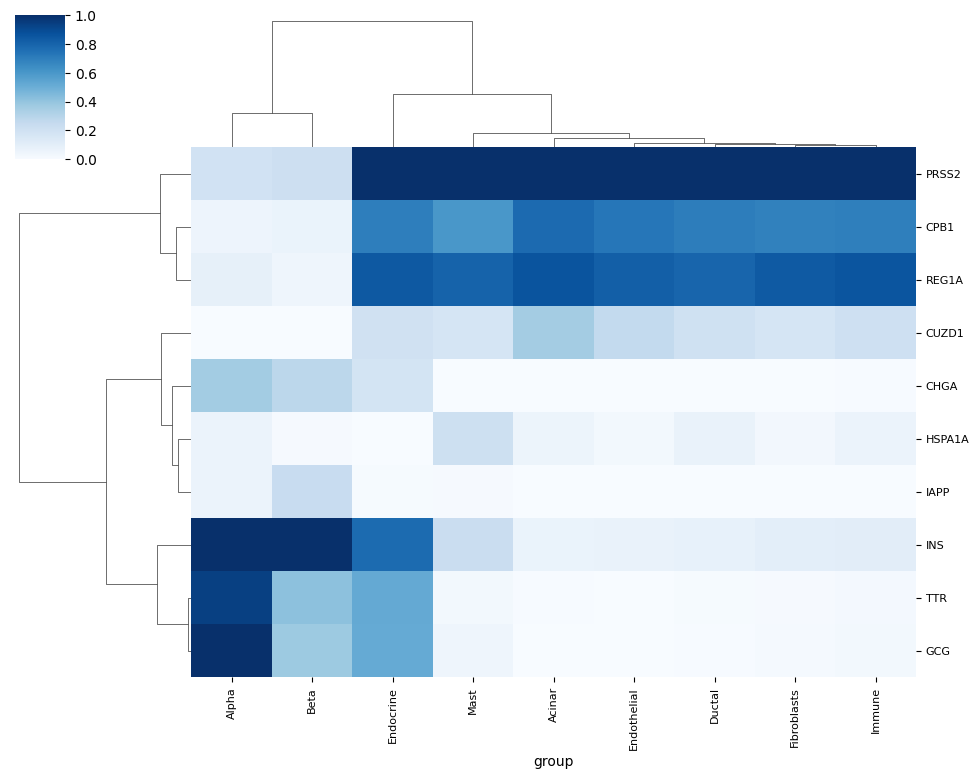

In [35]:
# 1. Subset the AnnData object to include only the genes you're interested in
genes_of_interest = adata.uns["moranI"].head(20).index  # Replace with your gene set

# 2. Extract expression data for the genes
# Use .raw if you want to use raw data, otherwise use adata.X (processed)

#values = adata[:, genes_of_interest].X

gene_expr_data = pd.DataFrame(
    adata[:, genes_of_interest].X.todense(),   # Extracts expression data for the specified genes
    index=adata.obs_names,           # Cell names
    columns=genes_of_interest        # Gene names
)

# 3. Group by a field in `obs` (e.g., cluster or cell type)
group_field = 'cell_type_coarse'  # Replace with the field you want to group by, e.g., 'leiden', 'cell_type'
gene_expr_data['group'] = adata.obs[group_field]

# 4. Aggregate the gene expression data by the grouping field
grouped_data = gene_expr_data.groupby('group').mean()

# 5. Plot the clustermap with Seaborn
g = sns.clustermap(
    grouped_data.T,                     # Transpose to have genes on the x-axis, clusters on the y-axis
    standard_scale=1,                   # Standardize across the genes (columns)
    cmap='Blues',                     # Colormap for the heatmap
    figsize=(10, 8),                    # Set the figure size
    metric='euclidean',                 # Distance metric for clustering (can be 'euclidean', 'correlation', etc.)
    method='ward',                       # Clustering method (can be 'ward', 'average', 'single', etc.)
    xticklabels=True,                  # Show x-axis labels (genes)
    yticklabels=True                   # Show y-axis labels (groups)
)

# 6. Rotate the x-axis labels (gene names) for readability
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=90)

# 7. Optionally, adjust font size for better visibility
g.ax_heatmap.tick_params(axis='x', labelsize=8)  # Change font size for x-axis
g.ax_heatmap.tick_params(axis='y', labelsize=8)  # Change font size for y-axis


/tmp/ipykernel_152646/1690255480.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = adata.obs.groupby(['condition', 'CellTypes_max']).size().unstack(fill_value=0)


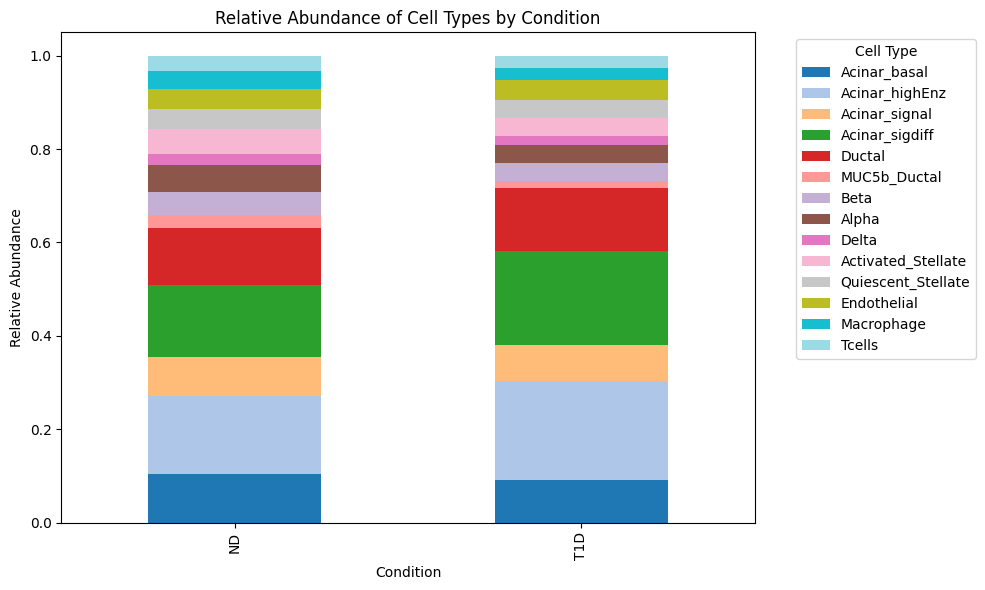

In [46]:
# Step 1: Group observations by 'condition' and count each 'CellTypes_max' entry
counts = adata.obs.groupby(['condition', 'CellTypes_max']).size().unstack(fill_value=0)

# Step 2: Calculate relative abundance (proportion) by normalizing counts within each condition
relative_abundance = counts.div(counts.sum(axis=1), axis=0)

# Step 3: Plot stacked bar plot
relative_abundance.plot(kind='bar', stacked=True, colormap="tab20", figsize=(10, 6))

# Add labels and title
plt.xlabel('Condition')
plt.ylabel('Relative Abundance')
plt.title('Relative Abundance of Cell Types by Condition')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_152646/553711767.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = adata.obs.groupby(['condition', 'CellTypes_max']).size().unstack(fill_value=0)


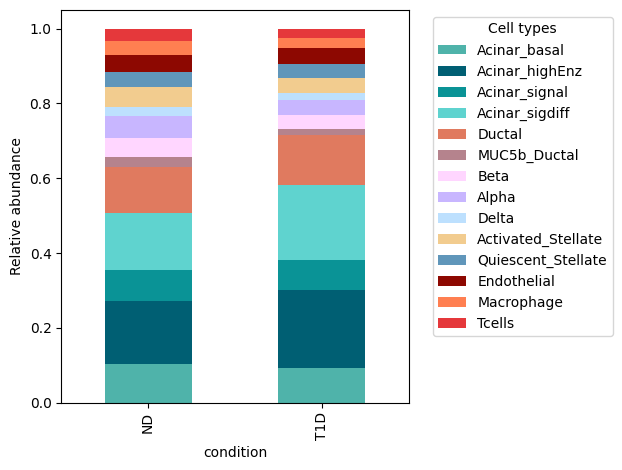

In [47]:
# Step 1: Group observations by 'condition' and count each 'CellTypes_max' entry
counts = adata.obs.groupby(['condition', 'CellTypes_max']).size().unstack(fill_value=0)

# Step 2: Calculate relative abundance (proportion) by normalizing counts within each condition
relative_abundance = counts.div(counts.sum(axis=1), axis=0)

#colors 
colors = ['#4FB3AA',#'Acinar_basal'
          '#005F73',#'Acinar_highEnz', 
          '#0A9396',#'Acinar_sigdiff', 
          '#5FD3CF',#'Acinar_signal',
          '#e07a5f',#'Activated_Stellate', 
          '#b5838d',#'Alpha', 
          #'#f8ad9d',#'Bcells', 
          '#ffd6ff',#'Beta', 
          '#c8b6ff',#'Delta', 
          '#bde0fe',#'Ductal',
          '#f2cc8f',#'Endothelial', 
          #'#ffa62b',#'LymphEndo', 
          '#6096ba',#'MUC5b_Ductal', 
          '#8d0801',#'Macrophage', 
          #'#4f000b',#'Mast',
          '#ff7f51',#'Quiescent_Stellate', 
          #'#ce4257',#'Schwann', 
          '#e5383b',#'Tcells'
]

# Plot a stacked bar chart
ax = relative_abundance.plot(kind='bar', stacked=True,color=colors)

# Customize the plot (labels, title, etc.)
plt.xlabel('condition')
plt.ylabel('Relative abundance')
#plt.title('Stacked Bar Plot of Counts per Category')
plt.xticks(rotation=90)
# Step 3: Position the legend outside the plot
plt.legend(title='Cell types', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()


# Show the plot
plt.show()

Let's explore the data following each section of the npod manuscript

### Comprehensive map of pancreatic cell type gene expression

276,906 gene expression profiles which mapped to 18 clusters 

- Significant change in beta cell abundance across T1D progression. It was also the case for delta cells.
- Alpha cells, T cells, B cells, and macrophages had increased proportion in both T1D AAB+ and recent-onset T1D.
- Enzyme-producing acinar cells and MUC5B+ ductal cells had increased abundance in T1D AAB+.

In [16]:
markers = {
    'Acinar_basal' : 'REG1A', 
    #'Acinar_highEnz': 'PRSS1', # not present in spatial gene panel 
    'Acinar_signal': 'MT1X',
    'Acinar_sigdiff' : 'SOD2', 
    #'Ductal':'CFTR', # not present in spatial gene panel 
    #'MUC5b_Ductal':'MUC5B', # not present in spatial gene panel 
    'Beta':'INS', 
    'Alpha':'GCG', 
    'Delta':'SST',
    'Activated_Stellate':'COL6A3', 
    'Quiescent_Stellate':'SPARCL1',    
    #'Endothelial':'PLVAP',  # not present in spatial gene panel 
    #'LymphEndo':'FLT4', # gone after dissociated data filtering
    'Macrophage':'C1QB', 
    'Tcells':'CD2',
    #'Schwann':'CDH19',# gone after dissociated data filtering
    #'Mast':'KIT', # gone after dissociated data filtering
    #'Bcells':'CD53', # gone after dissociated data filtering
}

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


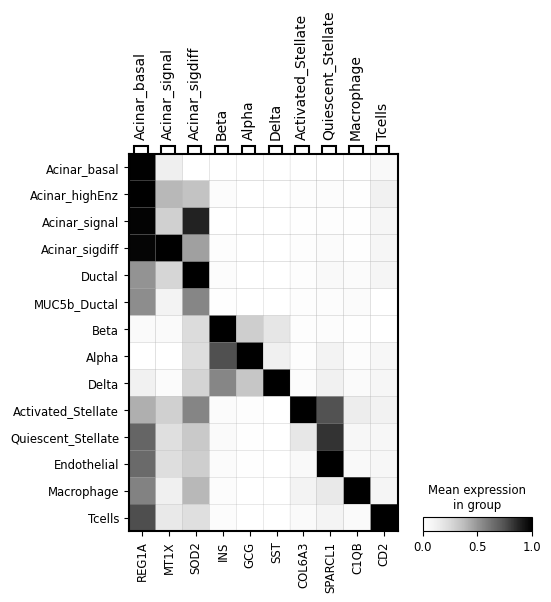

In [10]:
sc.pl.matrixplot(adata, markers, groupby='CellTypes_max', dendrogram=False,
                 cmap='Greys',standard_scale='var')

In [26]:
markers.items()

dict_items([('Acinar_basal', 'REG1A'), ('Acinar_signal', 'MT1X'), ('Acinar_sigdiff', 'SOD2'), ('Beta', 'INS'), ('Alpha', 'GCG'), ('Delta', 'SST'), ('Activated_Stellate', 'COL6A3'), ('Quiescent_Stellate', 'SPARCL1'), ('Macrophage', 'C1QB'), ('Tcells', 'CD2')])

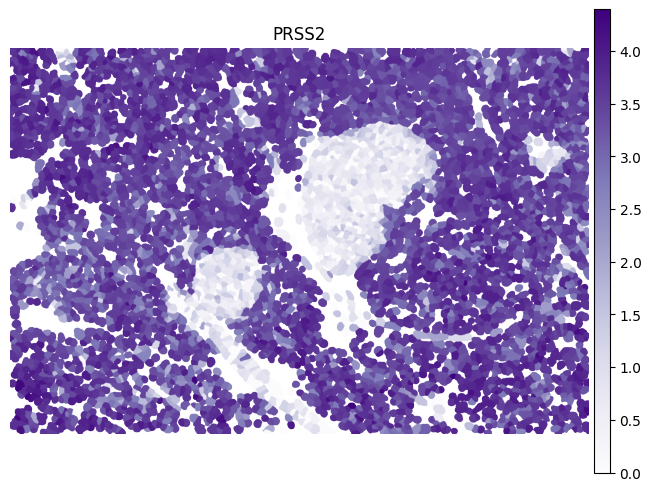

In [43]:
sq.pl.spatial_segment(adata,color=['PRSS2'],ncols=1,frameon=False,
                          library_id=['12'],library_key='fov', seg_cell_id='cell_ID',cmap='Purples',img=False)

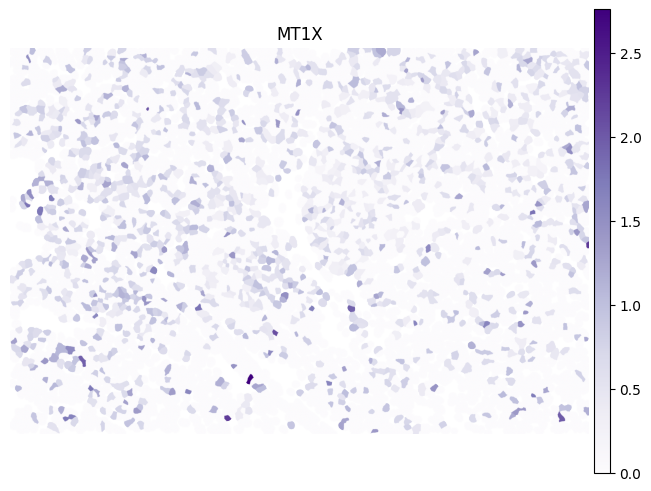

In [44]:
sq.pl.spatial_segment(adata,color=['MT1X'],ncols=1,frameon=False,
                          library_id=['12'],library_key='fov', seg_cell_id='cell_ID',cmap='Purples',img=False)

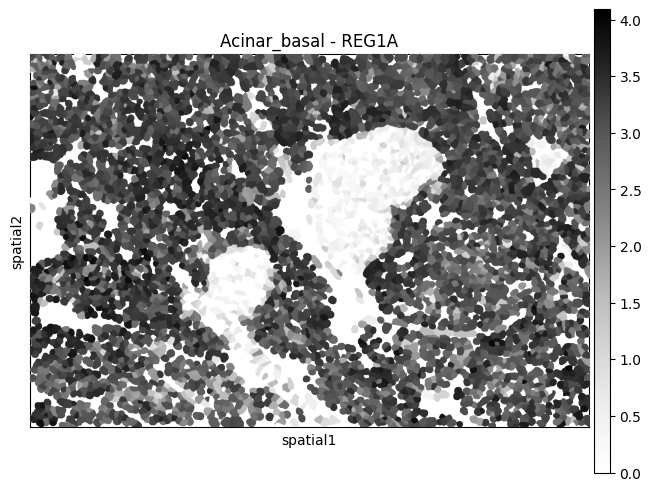

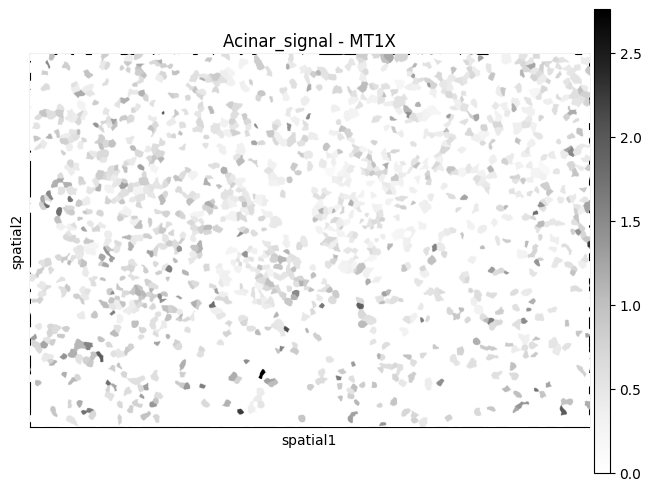

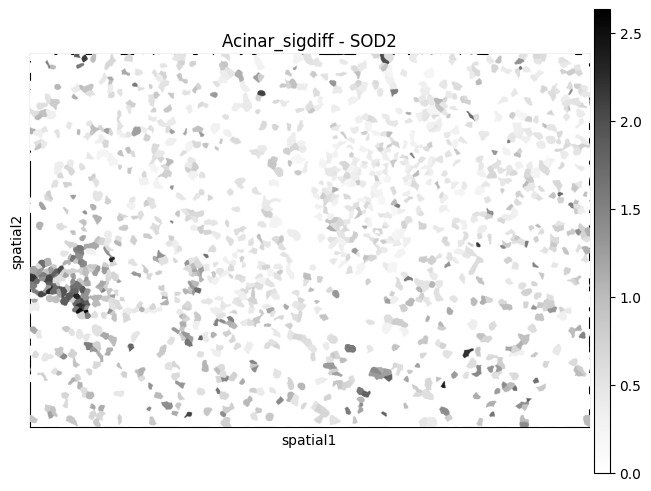

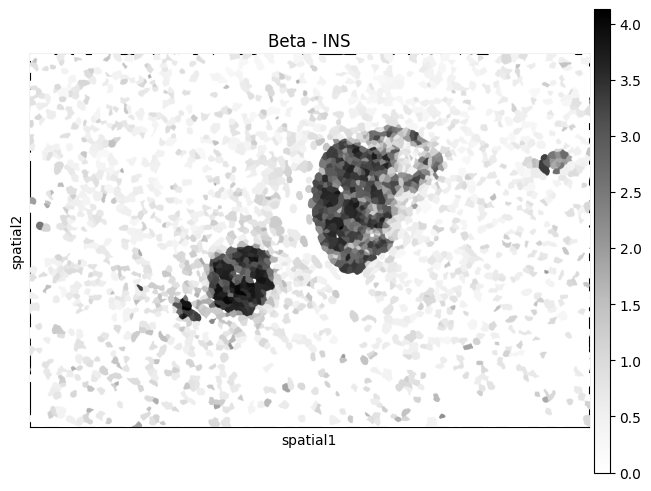

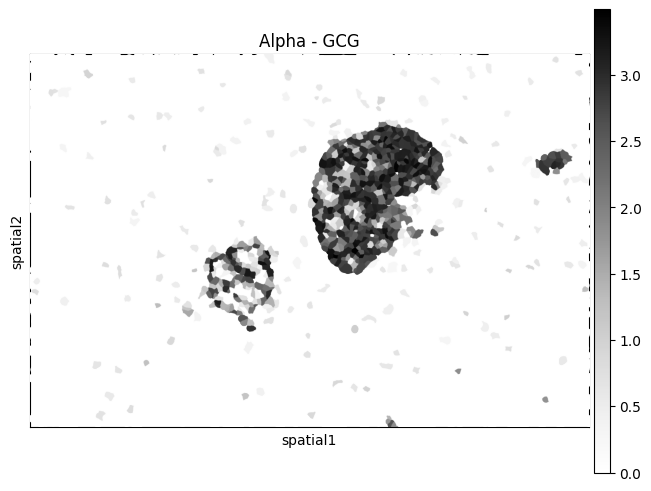

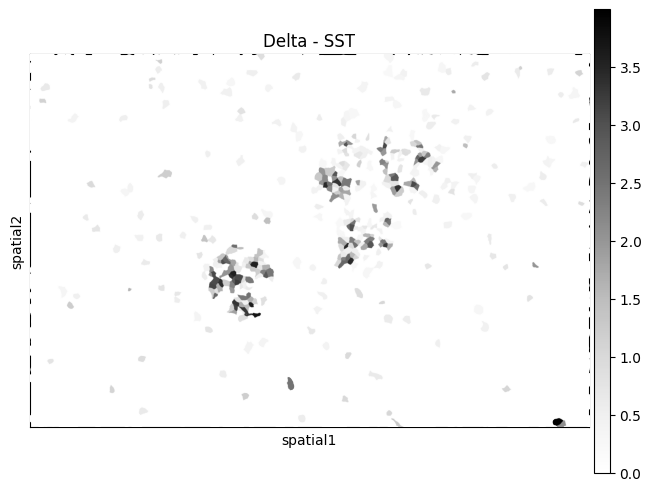

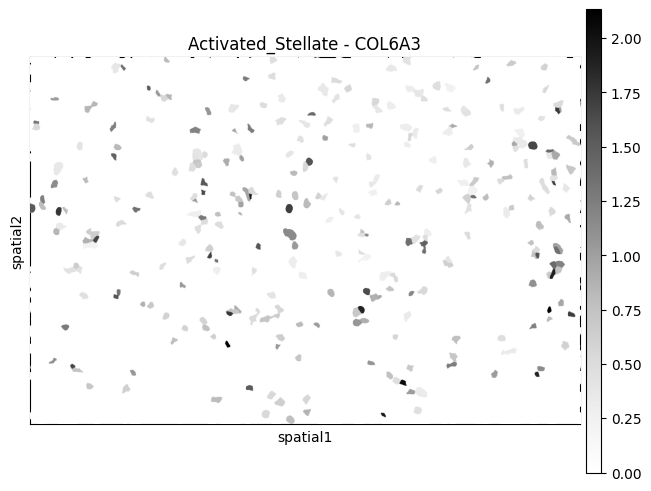

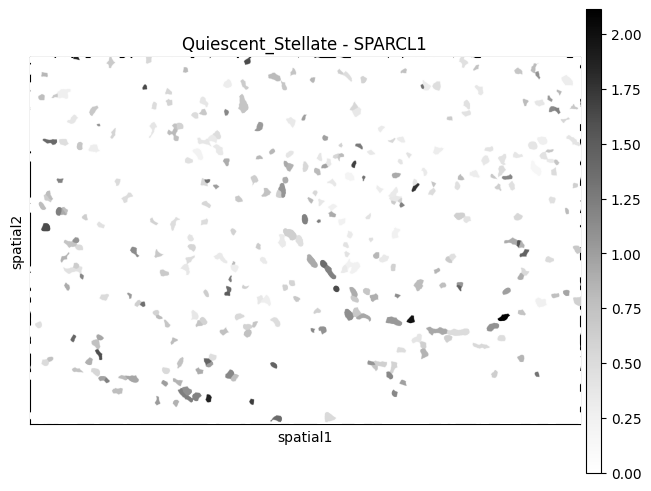

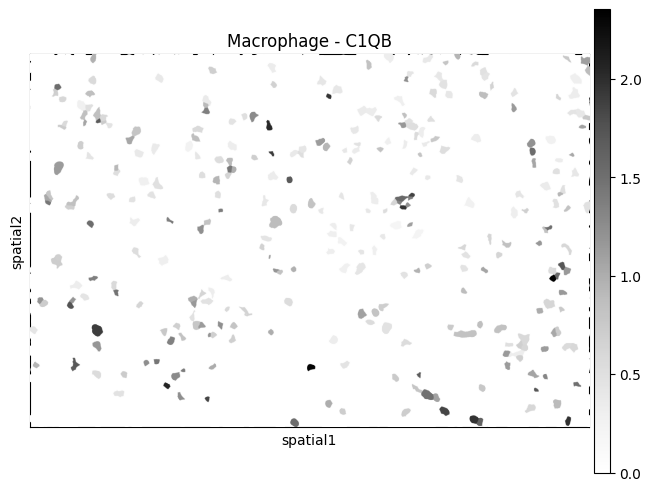

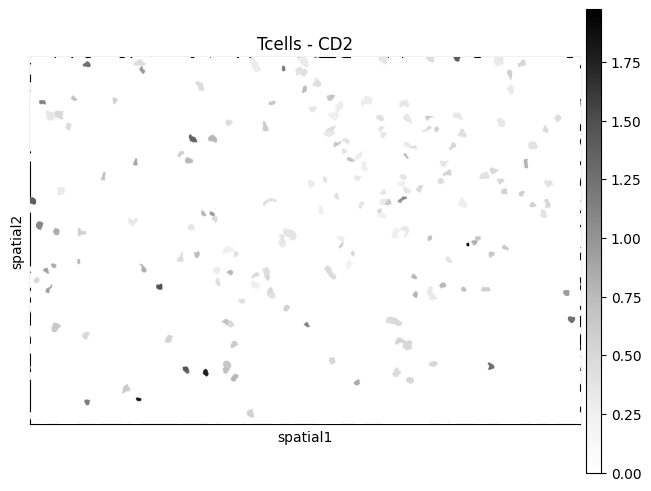

In [33]:
for ct,marker in markers.items():
    sq.pl.spatial_segment(adata,color=[marker],ncols=1,title=ct+' - '+marker,
                          library_id=['12'],library_key='fov', seg_cell_id='cell_ID',cmap='Greys',img=False)

Cell type specific markers

In [34]:
ct_markers = {
    'Beta' : ['INS', 'IAPP', 'G6PC2', 'PLCH2', 'NRG2', 'RBFOX3','MTUS2'], 
    'Endothelial' : ['INHBB', 'BMP6', 'FCN3', 'PCAT19'],
    'MUC5b_Ductal' : ['ERN2', 'CYP2C18', 'MYO7B', 'DMBT1'],
    'Acinar_highEnz' : ['CTRB1', 'CTRB2', 'PRSS1', 'PRSS2', 'PNLIP', 'CEL', 'CELA3A', 'CELA3B'],
    'Acinar_sigdiff' :  ['MT1', 'MT2', 'REG1A', 'REG1B', 'PTF1A', 'HES1'],
}

Subset to only the markers that are present in the spatial gene panel. We will loop through all cell types and keep only the genes that we find in our adata object as markers for that cell type. This will prevent errors once we start plotting.

In [35]:
marker_genes_in_data = dict()
for ct, markers in ct_markers.items():
    markers_found = list()
    for marker in markers:
        if marker in adata.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


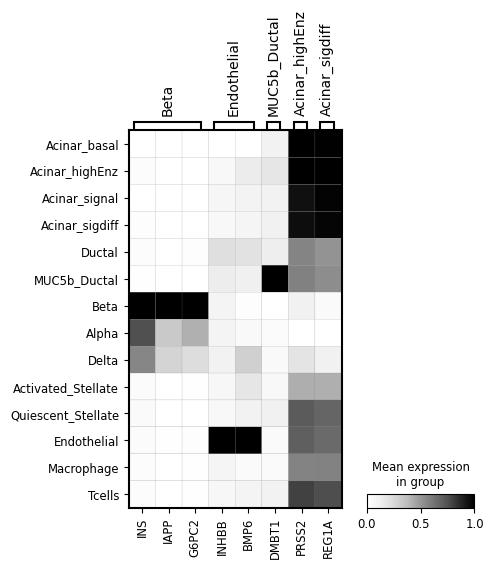

In [36]:
sc.pl.matrixplot(adata, marker_genes_in_data, groupby='CellTypes_max', dendrogram=False,
                 cmap='Greys',standard_scale='var')

### Comprehensive map of pancreatic cell type accessible chromatin  

Annotation of cell type identity by label transferring using Seurat → 203,348 chromatin profiles mapping to the same cell types and sub-types in the expression map. 

- The proportions of each cell type were also highly correlated between the gene expression and accessible chromatin maps. However, several cell sub-types (e.g., MUC5b+ ductal) had little representation in accessible chromatin and, therefore, may not be as distinguished in this modality.
- **TODO** compare cell type proportions in the spatial data
- Most TFs aren’t present in the spatial gene panel, but we can have an indirect idea of their activity 
- **TODO** include activities in the object used for visualization

### Pancreatic cell type gene expression in T1D progression 

Most significant changes in gene and pathway expression were observed in recent on-set T1D.

- **TODO** include signalling pathways in object used for visualization
- **WIP**: Differential abundance analysis to compare between conditions 